# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import shutil
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

# Path of Dataset

In [2]:
base_dir = 'E:\\Jupyter Directory\\Deep Learning\\Image Classification Project\\Image Data Classification\\split_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Preprocessing

In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.7, 1.3]
)

In [5]:
val_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 128,
    class_mode = 'binary'
)

Found 2498 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size = 128,
    class_mode = 'binary'
)

Found 2501 images belonging to 2 classes.


In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 128,
    class_mode = 'binary'
)

Found 19999 images belonging to 2 classes.


# CNN Model

In [1]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

NameError: name 'Sequential' is not defined

In [9]:
model.compile(optimizer = Adam(learning_rate=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 30,
    validation_data = val_generator,
    validation_steps = val_generator.samples // val_generator.batch_size
)

Epoch 1/30
141/156 [==========================>...] - ETA: 59s - loss: 0.6403 - accuracy: 0.6267 

E:\Anaconda\envs\Tf_Env\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


156/156 [==============================] - 635s 4s/step - loss: 0.6372 - accuracy: 0.6311 - val_loss: 0.5791 - val_accuracy: 0.6854
Epoch 2/30
156/156 [==============================] - 640s 4s/step - loss: 0.5894 - accuracy: 0.6818 - val_loss: 0.5226 - val_accuracy: 0.7504
Epoch 3/30
156/156 [==============================] - 620s 4s/step - loss: 0.5569 - accuracy: 0.7131 - val_loss: 0.4654 - val_accuracy: 0.7841
Epoch 4/30
156/156 [==============================] - 704s 5s/step - loss: 0.5259 - accuracy: 0.7367 - val_loss: 0.4445 - val_accuracy: 0.7998
Epoch 5/30
156/156 [==============================] - 591s 4s/step - loss: 0.5002 - accuracy: 0.7548 - val_loss: 0.4248 - val_accuracy: 0.8133
Epoch 6/30
156/156 [==============================] - 500s 3s/step - loss: 0.4861 - accuracy: 0.7637 - val_loss: 0.4871 - val_accuracy: 0.7903
Epoch 7/30
156/156 [==============================] - 510s 3s/step - loss: 0.4677 - accuracy: 0.7730 - val_loss: 0.4061 - val_accuracy: 0.8125
Epoch 8/30

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Accuracy and Loss

Text(0.5, 1.0, 'Training and Validation Accuracy')

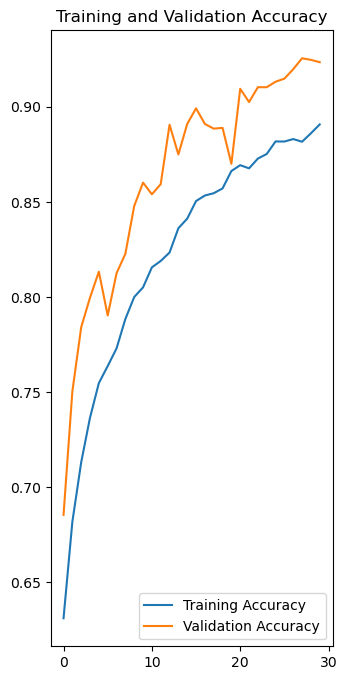

In [12]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

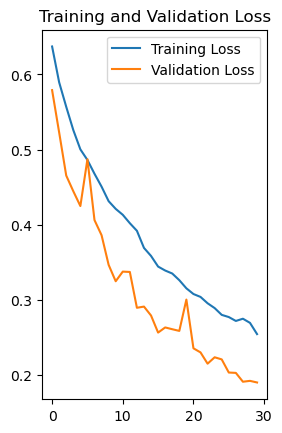

In [13]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Test Accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc}")

19/19 [==============================] - 33s 2s/step - loss: 0.2041 - accuracy: 0.9137
Test Accuracy: 0.9136512875556946


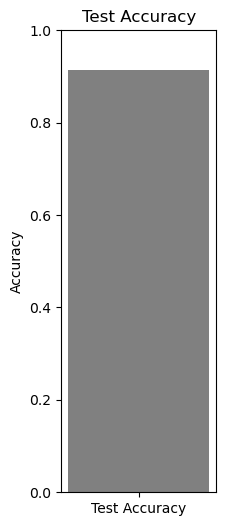

In [21]:
plt.figure(figsize=(2, 6))
plt.bar(['Test Accuracy'], [test_acc], color='grey')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()

# Testing Model on Pics

In [22]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0 
    return img_array

In [23]:
def predict_image(model, img_path):
    processed_image = preprocess_image(img_path)
    prediction = model.predict(processed_image)
    
    if prediction[0] < 0.5:
        print("The image is predicted to be a cat.")
    else:
        print("The image is predicted to be a dog.")

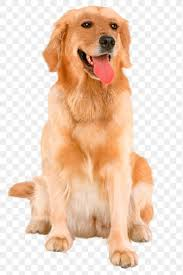

In [27]:
from IPython.display import Image, display
image_path = 'C:\\Users\\zeesh\\Downloads\\images.jpeg'
display(Image(filename=image_path, width=300, height=300))

In [30]:
test_image_path = 'C:\\Users\\zeesh\\Downloads\\images.jpeg'
predict_image(model, test_image_path)

1/1 [==============================] - 0s 59ms/step
The image is predicted to be a dog.


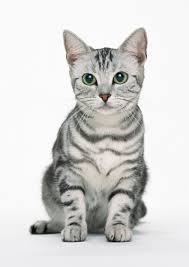

In [29]:
from IPython.display import Image, display
image_path = 'C:\\Users\\zeesh\\Downloads\\image.jpeg'
display(Image(filename=image_path, width=300, height=300))

In [31]:
test_image_path = 'C:\\Users\\zeesh\\Downloads\\image.jpeg'
predict_image(model, test_image_path)

1/1 [==============================] - 0s 62ms/step
The image is predicted to be a cat.


In [33]:
test_image_path = 'C:\\Users\\zeesh\\Downloads\\dog1.jpg'
predict_image(model, test_image_path)

1/1 [==============================] - 0s 421ms/step
The image is predicted to be a dog.
